## Постановка задачи
В MOBA(multiplayer online battle arena) League of Legends соревнуются две команды синяя и красная. Необходимо предсказать какая команда станет победителем. Предсказание делается в GrandMaster Rank.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## 1. Считывание данных

In [3]:
data = pd.read_csv('GrandMaster_Ranked_Games.csv')

In [4]:
data

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,...,5,35272,35372,506,54,10.8,113,2,17891,24158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,3868504952,1928,0,1,0,0,0,0,2,0,...,60,94554,72361,804,80,16.0,209,10,57739,72450
65892,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455
65893,4100240254,948,1,1,1,0,0,0,1,0,...,3,16574,20972,351,40,8.0,56,0,7138,6808
65894,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124


In [5]:
data = data.loc[:,data.columns != 'gameId']

## 2. Визуализация данных

In [7]:
des = data.describe()
des

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,...,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000,65896.000000
mean,1427.961591,0.495614,0.506966,0.515873,0.234400,0.395305,0.381192,1.339034,0.295117,4.319549,...,41.146868,69860.214004,48184.144060,504.256966,65.149706,13.029941,124.395229,5.730348,24847.151208,36596.842084
std,429.784566,0.499985,0.499955,0.499752,0.423626,0.488920,0.485683,1.253090,0.534107,3.357334,...,29.915931,37720.746933,16227.499768,183.738764,14.935247,2.987049,67.937351,3.675253,15326.178370,26882.265764
min,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,20.000000,41824.750000,36718.000000,381.000000,56.000000,11.200000,83.000000,3.000000,13689.000000,12271.750000
50%,1414.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,36.000000,64709.000000,48136.000000,521.000000,66.000000,13.200000,128.000000,5.000000,21879.000000,32094.500000
75%,1724.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,...,55.000000,91243.250000,59205.000000,632.000000,76.000000,15.200000,171.000000,8.000000,32681.000000,57075.000000
max,3301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,...,229.000000,325940.000000,123884.000000,1287.000000,139.000000,27.800000,417.000000,29.000000,206758.000000,197135.000000


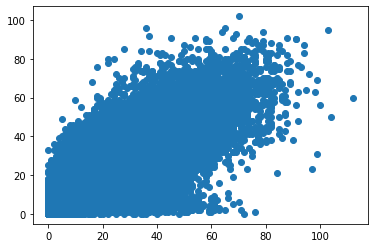

In [9]:
plt.scatter(data['blueKills'], data['redKills'])
pass    

In [11]:
data1 = data.loc[:,['blueKills','redKills','blueDeath','redDeath']]

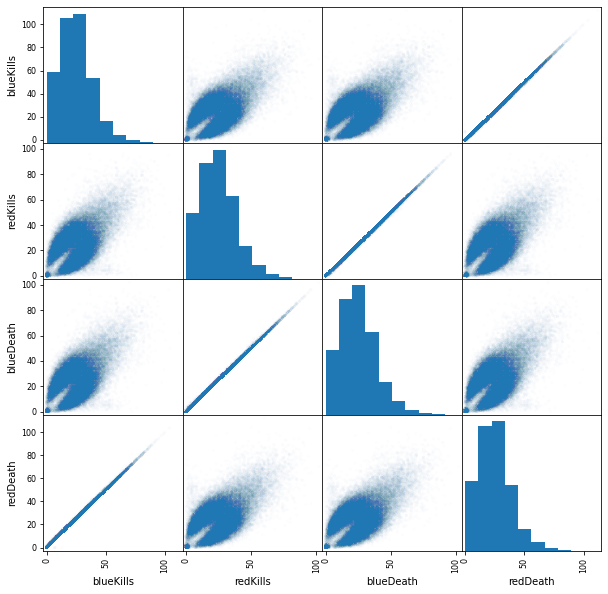

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(data1, alpha = .01, figsize = (10, 10))
pass

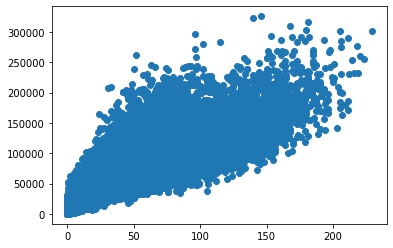

In [14]:
plt.scatter(data['redAssist'], data['redChampionDamageDealt'])
pass 

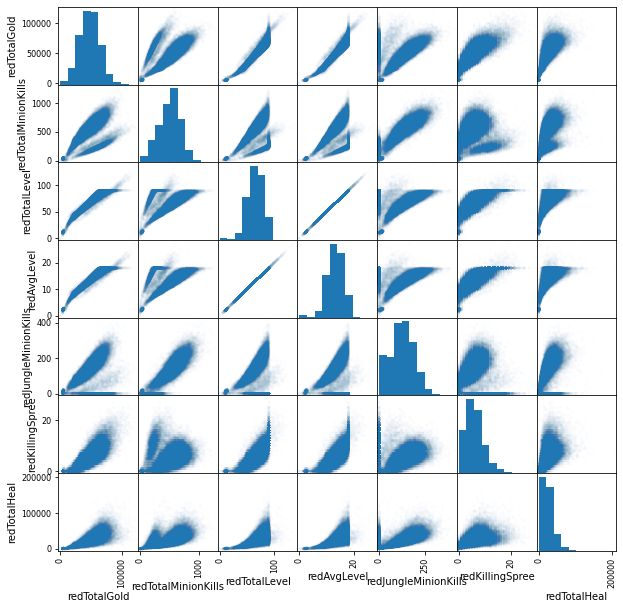

In [15]:
data2 = data.loc[:,['redTotalGold','redTotalMinionKills','redTotalLevel','redAvgLevel','redJungleMinionKills','redKillingSpree','redTotalHeal']]
scatter_matrix(data2, alpha = .01, figsize = (10, 10))
pass

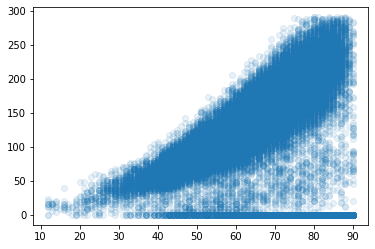

In [51]:
plt.scatter(data['redTotalLevel'], data['redJungleMinionKills'],alpha = .1)
pass 

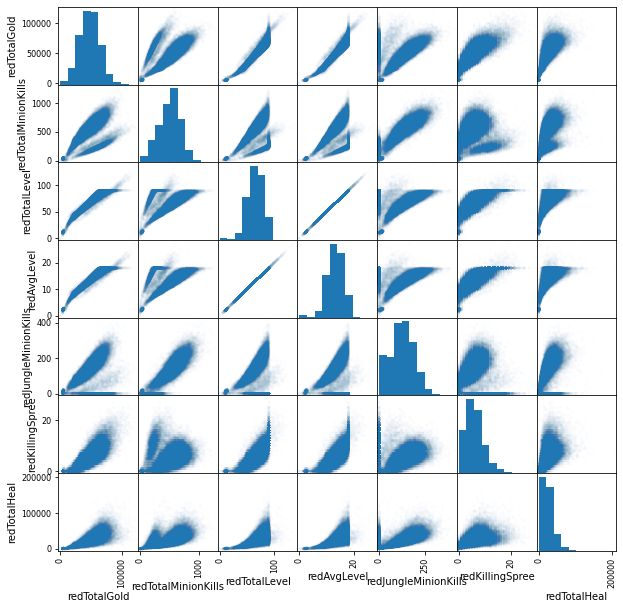

In [49]:
data3 = data.loc[:,['blueTotalGold','blueTotalMinionKills','blueTotalLevel','blueAvgLevel','blueJungleMinionKills','blueKillingSpree','blueTotalHeal']]
scatter_matrix(data2, alpha = .01, figsize = (10, 10))
pass

In [16]:
data.corr()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameDuraton,1.000000,-0.018589,0.001533,0.048111,0.405861,0.094726,0.167544,0.494476,0.502119,0.407733,...,0.318131,0.665034,0.760239,0.896487,0.731250,0.731250,0.780910,0.336922,0.708775,0.638573
blueWins,-0.018589,1.000000,0.202711,0.459949,0.361664,0.264384,0.650728,0.449474,0.348685,0.712080,...,-0.329962,-0.170559,-0.272955,-0.097746,-0.219181,-0.219181,-0.231321,-0.398132,-0.223106,-0.541666
blueFirstBlood,0.001533,0.202711,1.000000,0.212475,0.056349,0.140685,0.153840,0.135139,0.048366,0.190685,...,-0.087672,-0.042025,-0.075427,-0.029869,-0.048723,-0.048723,-0.051263,-0.124470,-0.038480,-0.136138
blueFirstTower,0.048111,0.459949,0.212475,1.000000,0.138477,0.204402,0.377750,0.288639,0.115972,0.480995,...,-0.140230,-0.070251,-0.124560,-0.015324,-0.064355,-0.064355,-0.111952,-0.227905,-0.055976,-0.311200
blueFirstBaron,0.405861,0.361664,0.056349,0.138477,1.000000,0.130357,0.400443,0.435059,0.884712,0.528228,...,-0.064030,0.159407,0.175516,0.393394,0.176030,0.176030,0.266921,-0.051591,0.171018,0.015274
blueFirstDragon,0.094726,0.264384,0.140685,0.204402,0.130357,1.000000,0.166439,0.587881,0.122767,0.287008,...,-0.239024,-0.116670,-0.110744,0.130661,-0.108089,-0.108089,0.081064,-0.230973,-0.061571,-0.115768
blueFirstInhibitor,0.167544,0.650728,0.153840,0.377750,0.400443,0.166439,1.000000,0.393397,0.380023,0.772252,...,-0.092168,0.058959,0.002553,0.057762,0.045121,0.045121,-0.106555,-0.153070,-0.008447,-0.319390
blueDragonKills,0.494476,0.449474,0.135139,0.288639,0.435059,0.587881,0.393397,1.000000,0.468155,0.622567,...,-0.186984,0.118582,0.151392,0.491317,0.144432,0.144432,0.347519,-0.176366,0.177377,0.015961
blueBaronKills,0.502119,0.348685,0.048366,0.115972,0.884712,0.122767,0.380023,0.468155,1.000000,0.541402,...,-0.010974,0.249918,0.266071,0.467110,0.248117,0.248117,0.343423,0.001275,0.261514,0.097454
blueTowerKills,0.407733,0.712080,0.190685,0.480995,0.528228,0.287008,0.772252,0.622567,0.541402,1.000000,...,-0.151792,0.131911,0.103965,0.313201,0.128950,0.128950,0.126442,-0.183191,0.117346,-0.164875


Боремся с выбросами

In [18]:
binary_column = [c for c in data.columns if data[c].unique().shape == (2,)]
numeric_column = [c for c in data.columns if data[c].unique().shape != (2,)]
len(numeric_column)+len(binary_column)

49

In [19]:
data[numeric_column].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,gameDuraton,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0.005,193.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,1868.90,4688.950,29.475,12.0,2.4,0.0,0.0,635.425,0.00
0.010,199.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,...,0.0,2779.40,5425.800,43.000,13.0,2.6,0.0,0.0,1090.750,0.00
0.050,812.00,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,6.00,...,5.0,20182.00,22649.750,182.000,42.0,8.4,0.0,1.0,6206.000,2240.50
0.100,922.00,0.0,0.0,0.0,0.0,2.0,0.0,8.0,8.0,10.00,...,10.0,27094.50,27458.000,245.000,47.0,9.4,0.0,1.0,8637.500,4936.00
0.500,1414.00,1.0,0.0,4.0,0.0,54.0,18.0,24.0,24.0,36.00,...,36.0,64709.00,48136.000,521.000,66.0,13.2,128.0,5.0,21879.000,32094.50
0.900,1984.00,3.0,1.0,9.0,2.0,93.0,40.0,42.0,42.0,77.00,...,77.0,119198.00,68537.500,727.000,84.0,16.8,209.0,10.0,44897.500,74576.00
0.950,2139.25,4.0,1.0,10.0,2.0,106.0,47.0,49.0,50.0,101.25,...,101.0,138918.25,74289.500,785.000,89.0,17.8,232.0,12.0,53451.250,83709.00
0.990,2444.00,4.0,2.0,11.0,3.0,130.0,62.0,66.0,65.0,147.00,...,146.0,183023.95,87137.500,899.000,90.0,18.0,275.0,17.0,73862.150,102525.55
0.995,2572.05,5.0,2.0,11.0,4.0,140.0,67.0,71.0,71.0,159.00,...,158.0,201842.65,92580.625,943.000,90.0,18.0,291.0,19.0,82652.850,110229.15


In [24]:
temp = data['blueWins'] > 2
for c in numeric_column:
    temp = temp | (data[c] < data[c].quantile(0.005)) | (data[c] > data[c].quantile(0.995))
rows_to_drop = data[temp].index
work_data = data.drop(rows_to_drop)
data.shape

(61434, 49)

Основные характеристики и корреляционная матрица

In [25]:
des = work_data.describe()
des

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,55296.000000,55296.000000,55296.000000,55296.000000,55296.00000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,...,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000
mean,1405.824255,0.496727,0.508066,0.524070,0.23168,0.413647,0.370045,1.325195,0.267054,4.250977,...,37.582899,64079.238806,46230.908637,504.802246,64.010326,12.802065,125.239041,5.325412,23126.492549,35602.920645
std,347.708059,0.499994,0.499939,0.499425,0.42191,0.492491,0.482821,1.184479,0.488690,3.330739,...,24.579941,28552.605703,12806.594486,152.664984,11.841676,2.368335,57.915706,3.083087,12306.298747,24333.019084
min,595.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,10041.000000,14605.000000,98.000000,29.000000,5.800000,0.000000,0.000000,2724.000000,0.000000
25%,1135.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,...,19.000000,41518.000000,36529.000000,403.000000,55.000000,11.000000,90.000000,3.000000,13682.000000,13824.000000
50%,1400.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,4.000000,...,33.000000,61027.000000,46456.000000,522.000000,64.000000,12.800000,128.000000,5.000000,20792.000000,32002.000000
75%,1671.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,2.000000,0.000000,7.000000,...,50.000000,83168.250000,55919.000000,615.250000,73.000000,14.600000,166.000000,7.000000,30222.500000,54914.250000
max,2343.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,2.000000,11.000000,...,142.000000,166605.000000,80255.000000,868.000000,90.000000,18.000000,269.000000,16.000000,71087.000000,100024.000000


In [26]:
corr_mat = work_data.corr()
corr_mat

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameDuraton,1.000000,-0.018899,-0.003547,0.014683,0.425997,0.054317,0.173075,0.435089,0.481672,0.373040,...,0.299559,0.687847,0.754540,0.879239,0.701536,0.701536,0.774175,0.316562,0.688255,0.601100
blueWins,-0.018899,1.000000,0.206481,0.489102,0.395507,0.284766,0.679170,0.500401,0.386417,0.745747,...,-0.407922,-0.227165,-0.354943,-0.118610,-0.280858,-0.280858,-0.278548,-0.486295,-0.270519,-0.614093
blueFirstBlood,-0.003547,0.206481,1.000000,0.211772,0.060718,0.144186,0.149617,0.150103,0.052955,0.195015,...,-0.104591,-0.059541,-0.101660,-0.039555,-0.065129,-0.065129,-0.067814,-0.149316,-0.050586,-0.159396
blueFirstTower,0.014683,0.489102,0.211772,1.000000,0.143944,0.206753,0.370383,0.310489,0.125157,0.494375,...,-0.191135,-0.118225,-0.205526,-0.063094,-0.134933,-0.134933,-0.167340,-0.298199,-0.102666,-0.382546
blueFirstBaron,0.425997,0.395507,0.060718,0.143944,1.000000,0.114345,0.427856,0.422640,0.927189,0.529644,...,-0.071923,0.177073,0.162168,0.379184,0.161318,0.161318,0.231390,-0.073364,0.157454,-0.049247
blueFirstDragon,0.054317,0.284766,0.144186,0.206753,0.114345,1.000000,0.172035,0.602113,0.107354,0.276884,...,-0.256540,-0.145583,-0.173347,0.072461,-0.180402,-0.180402,0.007169,-0.265677,-0.099961,-0.199106
blueFirstInhibitor,0.173075,0.679170,0.149617,0.370383,0.427856,0.172035,1.000000,0.422698,0.414855,0.799600,...,-0.150876,0.025953,-0.053047,0.037732,0.004674,0.004674,-0.137468,-0.222031,-0.046838,-0.378384
blueDragonKills,0.435089,0.500401,0.150103,0.310489,0.422640,0.602113,0.422698,1.000000,0.430681,0.610898,...,-0.232235,0.067302,0.046713,0.399384,0.040582,0.040582,0.224769,-0.251561,0.095013,-0.142917
blueBaronKills,0.481672,0.386417,0.052955,0.125157,0.927189,0.107354,0.414855,0.430681,1.000000,0.533610,...,-0.035290,0.234927,0.220119,0.418719,0.210323,0.210323,0.275791,-0.036410,0.208500,0.001610
blueTowerKills,0.373040,0.745747,0.195015,0.494375,0.529644,0.276884,0.799600,0.610898,0.533610,1.000000,...,-0.217901,0.072991,-0.003171,0.242301,0.034955,0.034955,0.036942,-0.279741,0.042328,-0.293488


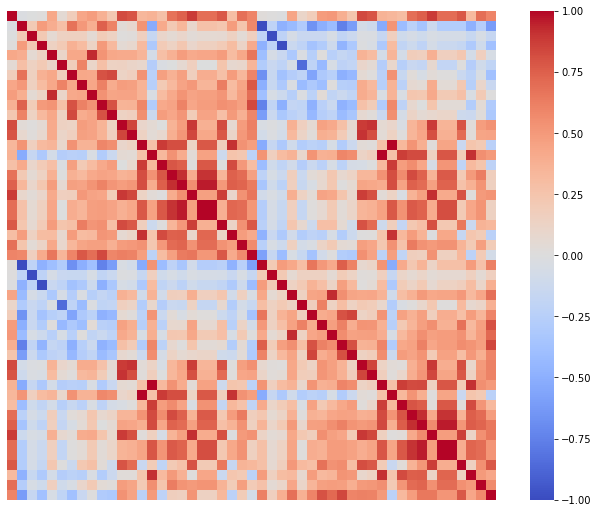

In [27]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, square=True, xticklabels='', yticklabels='', vmin=-1, vmax=1, center= 0, cmap='coolwarm')
pass

In [28]:
corr_mat > 0.5

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameDuraton,True,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,True,True
blueWins,False,True,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
blueFirstBlood,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueFirstTower,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blueFirstBaron,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
blueFirstDragon,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
blueFirstInhibitor,False,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
blueDragonKills,False,True,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
blueBaronKills,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
blueTowerKills,False,True,False,False,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


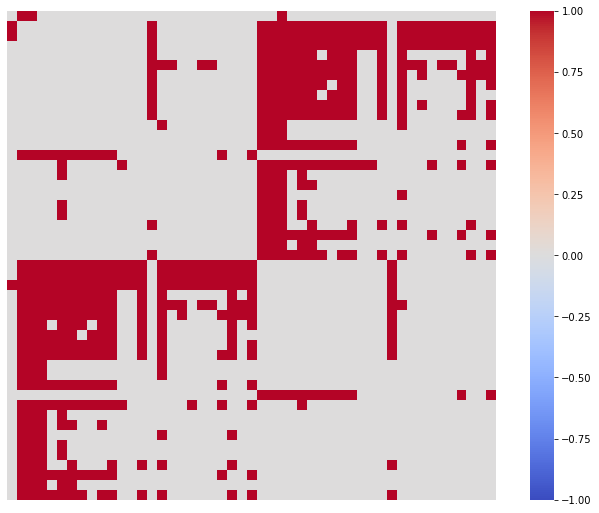

In [29]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat < -0.0, square=True, xticklabels='', yticklabels='', vmin=-1, vmax=1, center= 0, cmap='coolwarm')
pass

In [30]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

redTotalLevel    redAvgLevel              1.000000
blueTotalLevel   blueAvgLevel             1.000000
blueKills        redDeath                 0.999658
blueDeath        redKills                 0.999645
redTotalGold     redTotalLevel            0.958995
                                            ...   
redFirstBaron    redJungleMinionKills     0.502396
blueTotalGold    blueJungleMinionKills    0.501161
blueDragonKills  blueTotalMinionKills     0.500984
blueWins         blueDragonKills          0.500401
gameDuraton      redBaronKills            0.500060
Length: 259, dtype: float64

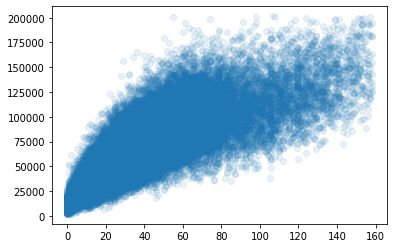

In [56]:
plt.scatter(data['redAssist'], data['redChampionDamageDealt'],alpha=0.1)
pass 

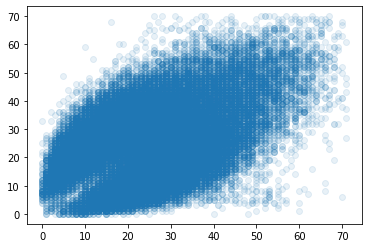

In [58]:
plt.scatter(data['blueKills'], data['redKills'],alpha=0.1)
pass 

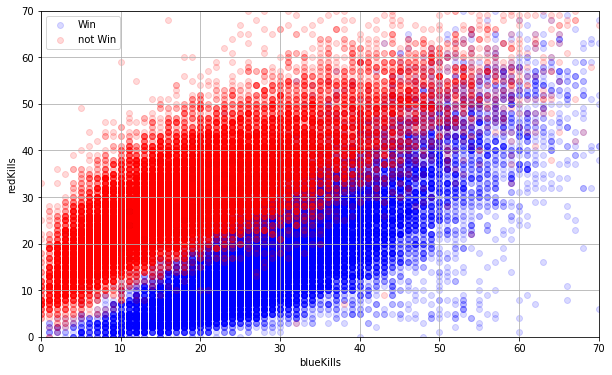

In [64]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['blueWins'] == 1]['blueKills'],
            data[data['blueWins'] == 1]['redKills'],
            alpha = 0.15,
            label = 'Win',
            color = 'b')

plt.scatter(data[data['blueWins'] == 0]['blueKills'],
            data[data['blueWins'] == 0]['redKills'],
            alpha = 0.15,
            label = 'not Win',
            color = 'r')

plt.xlabel('blueKills')
plt.xlim(0, 70)
plt.ylabel('redKills')
plt.ylim(0, 70)
plt.legend()
plt.grid()

## 3. Обработка пропущенных значений

In [31]:
work_data.isna().sum() 

gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills              0
redInhibitorKi

Пропущенных значений нет.

## 4. Обработка категориальных признаков

Категориальных признаков, которые нужно обработать нет.

## 5. Нормализация количественных признаков

In [33]:
work_data_b = work_data.loc[:,binary_column]
work_data_n = work_data.loc[:,numeric_column]
stand = (work_data_n - work_data_n.mean(axis = 0))/work_data_n.std(axis = 0)
stand.describe()

,gameDuraton,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,...,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04
mean,-1.192462e-16,8.737866e-18,-9.868649e-17,1.284980e-18,-1.099943e-16,1.027984e-16,4.728728e-17,-1.541976e-17,-1.223301e-16,-1.096088e-16,...,-6.373503e-17,-1.259281e-17,-2.518561e-16,-1.541976e-18,8.898489e-17,-3.748288e-16,-5.037123e-17,-1.192462e-16,6.964594e-17,7.786981e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.331911e+00,-1.118800e+00,-5.464688e-01,-1.276286e+00,-6.934803e-01,-2.044826e+00,-1.542684e+00,-1.884970e+00,-1.888118e+00,-1.484376e+00,...,-1.488323e+00,-1.892585e+00,-2.469502e+00,-2.664673e+00,-2.956535e+00,-2.956535e+00,-2.162437e+00,-1.727299e+00,-1.657890e+00,-1.463153e+00
25%,-7.767271e-01,-1.118800e+00,-5.464688e-01,-9.760526e-01,-6.934803e-01,-6.637433e-01,-7.501272e-01,-7.366007e-01,-7.378397e-01,-7.571857e-01,...,-7.560189e-01,-7.901639e-01,-7.575713e-01,-6.668343e-01,-7.608996e-01,-7.608996e-01,-6.084540e-01,-7.542480e-01,-7.674519e-01,-8.950357e-01
50%,-1.675042e-02,-2.745472e-01,-5.464688e-01,-7.535161e-02,-6.934803e-01,2.679805e-02,-1.160815e-01,-2.991184e-02,-2.997597e-02,-1.915935e-01,...,-1.864488e-01,-1.068988e-01,1.757621e-02,1.126503e-01,-8.720256e-04,-8.720256e-04,4.767203e-02,-1.055476e-01,-1.896990e-01,-1.479850e-01
75%,7.626391e-01,5.697060e-01,-5.464688e-01,8.253494e-01,5.168052e-01,6.789760e-01,6.764756e-01,6.767770e-01,6.778878e-01,5.355966e-01,...,5.051721e-01,6.685558e-01,7.564924e-01,7.234649e-01,7.591555e-01,7.591555e-01,7.037980e-01,5.431529e-01,5.766159e-01,7.936265e-01
max,2.695295e+00,2.258212e+00,3.546108e+00,2.026284e+00,4.147662e+00,2.788963e+00,3.133403e+00,3.326860e+00,3.332377e+00,4.211946e+00,...,4.248061e+00,3.590767e+00,2.656763e+00,2.379051e+00,2.194763e+00,2.194763e+00,2.482245e+00,3.462305e+00,3.897233e+00,2.647476e+00


In [34]:
data_stand = pd.concat((stand, work_data_b), axis = 1)
data_stand.describe()

,gameDuraton,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,...,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor
count,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,5.529600e+04,...,55296.000000,55296.00000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000
mean,-1.192462e-16,8.737866e-18,-9.868649e-17,1.284980e-18,-1.099943e-16,1.027984e-16,4.728728e-17,-1.541976e-17,-1.223301e-16,-1.096088e-16,...,0.524070,0.23168,0.413647,0.370045,0.503273,0.491934,0.475134,0.252785,0.509024,0.355722
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.499425,0.42191,0.492491,0.482821,0.499994,0.499939,0.499386,0.434613,0.499923,0.478736
min,-2.331911e+00,-1.118800e+00,-5.464688e-01,-1.276286e+00,-6.934803e-01,-2.044826e+00,-1.542684e+00,-1.884970e+00,-1.888118e+00,-1.484376e+00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.767271e-01,-1.118800e+00,-5.464688e-01,-9.760526e-01,-6.934803e-01,-6.637433e-01,-7.501272e-01,-7.366007e-01,-7.378397e-01,-7.571857e-01,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.675042e-02,-2.745472e-01,-5.464688e-01,-7.535161e-02,-6.934803e-01,2.679805e-02,-1.160815e-01,-2.991184e-02,-2.997597e-02,-1.915935e-01,...,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.626391e-01,5.697060e-01,-5.464688e-01,8.253494e-01,5.168052e-01,6.789760e-01,6.764756e-01,6.767770e-01,6.778878e-01,5.355966e-01,...,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.695295e+00,2.258212e+00,3.546108e+00,2.026284e+00,4.147662e+00,2.788963e+00,3.133403e+00,3.326860e+00,3.332377e+00,4.211946e+00,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Обучающая и тестовая выборки

In [37]:
X = data_stand.drop(['blueWins','redWins'], axis=1)
y = work_data['blueWins']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(41472, 13824)

## 7. Классификатор ближайших соседей

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [40]:
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.009018132716049383 0.012876157407407407


## Другие классификаторы

In [41]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.00019290123456790122 0.005497685185185185


In [42]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0008921682098765432 0.005570023148148148


## Общие выводы

Получилось достатосчно точно предсказать победителя на данном датасете. Алгоритм ближайшего соседа справился немного хуже чем gbt и ada